In [85]:
%config InlineBackend.figure_format = 'retina'

import pandas as pd

import datetime
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [51]:
items_category = pd.read_csv('./data/item_categories.csv')
items = pd.read_csv('./data/items.csv')
sales_train = pd.read_csv('./data/sales_train.csv',parse_dates=['date'])
shops = pd.read_csv('./data/shops.csv')
test_data = pd.read_csv('./data/test.csv')                            

In [52]:
items_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [53]:
items_category.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [54]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [55]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [56]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [57]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [58]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [59]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,999.00,1.0
1,2013-03-01,0,25,2552,899.00,1.0
2,2013-05-01,0,25,2552,899.00,-1.0
3,2013-06-01,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [60]:
sales_train.index.name = "sale_id"

In [61]:
sales_train.index

RangeIndex(start=0, stop=2935849, step=1, name='sale_id')

In [62]:
sales_train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

In [63]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
sale_id,,,,,,
0,2013-02-01,0,59,22154,999.00,1.0
1,2013-03-01,0,25,2552,899.00,1.0
2,2013-05-01,0,25,2552,899.00,-1.0
3,2013-06-01,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [64]:
#pd.crosstab(sales_train.item_id,sales_train.item_cnt_day)

In [65]:
sales_train.date

sale_id
0         2013-02-01
1         2013-03-01
2         2013-05-01
3         2013-06-01
4         2013-01-15
             ...    
2935844   2015-10-10
2935845   2015-09-10
2935846   2015-10-14
2935847   2015-10-22
2935848   2015-03-10
Name: date, Length: 2935849, dtype: datetime64[ns]

In [66]:
shop_sales = sales_train[sales_train.shop_id==25]

In [109]:
shop_sales_item = shop_sales[shop_sales.item_id==30][['date','item_cnt_day']]

In [110]:
shop_sales_item.set_index('date',inplace=True)

In [111]:
shop_sales_item

,item_cnt_day
date,
2013-02-20,-1.0
2013-02-21,3.0
2013-02-22,7.0
2013-02-23,6.0
2013-02-24,4.0
...,...
2015-04-03,1.0
2015-11-05,1.0
2015-05-25,1.0


In [112]:
shop_sales_item=shop_sales_item.resample('M').last()

In [118]:
shop_sales_item.tail()

,item_cnt_day
date,
2015-07-31,0.0
2015-08-31,0.0
2015-09-30,1.0
2015-10-31,0.0
2015-11-30,1.0


In [116]:
shop_sales_item.fillna(0,inplace=True)

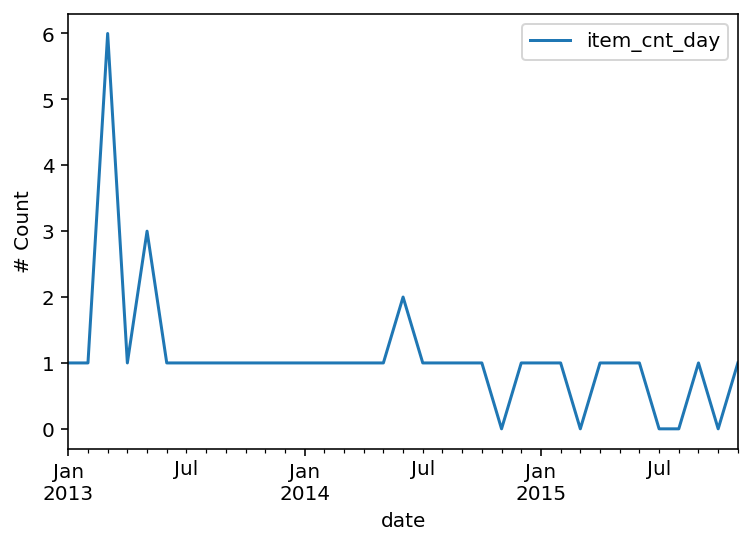

In [140]:
ax = shop_sales_item.plot();
ax.set_ylabel('# Count');

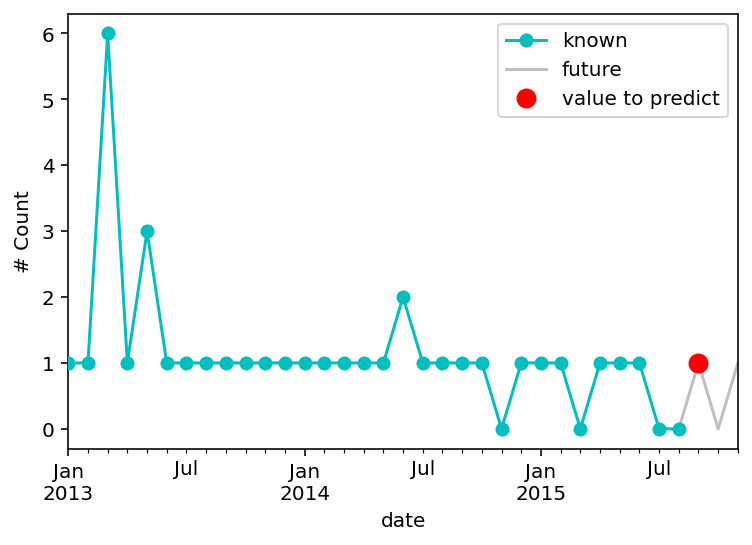

In [139]:
known = shop_sales_item.loc['2013-01-31':'2015-8-31']
unknown = shop_sales_item.loc['2015-8-31':'2016-12-31']
to_predict = shop_sales_item.loc['2015-09-30':'2015-09-30']

fig, ax = plt.subplots();
known.plot(ax=ax, c='c', marker='o', zorder=3);
unknown.plot(ax=ax, c='grey', alpha=0.5);
to_predict.plot(ax=ax, c='r', marker='o', markersize=9,
                linestyle='');

ax.legend(['known', 'future', 'value to predict']);
ax.set_ylabel('# Count');